In [1]:
from general_imports import *
import re

# Code source: https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/issues/1161
def generate_stats_from_log(experiment_name, line_interval=10, nb_data=10800, enforce_last_line=True, fig = None, ax = None):
    """
    Generate chart with all losses from log file generated by CycleGAN/Pix2pix/CUT framework
    """
    #extract every lines
    with open(os.path.join(experiment_name, "loss_log.txt"), 'r') as f:
        lines = f.readlines()
    #choose the lines to use for plotting
    lines_for_plot = []
    for i in range(1,len(lines)):
        if (i-1) % line_interval==0:
            lines_for_plot.append(lines[i])
    if enforce_last_line:
        lines_for_plot.append(lines[-1])
    #initialize dict with loss names
    dicts = dict()
    dicts["epoch"] = []
    parts = (lines_for_plot[0]).split(') ')[1].split(' ')
    for i in range(0, len(parts)//2):
        dicts[parts[2*i][:-1]] = []
    #extract all data
    pattern = "epoch: ([0-9]+), iters: ([0-9]+)"
    for l in lines_for_plot:
        search = re.search(pattern, l)
        epoch = int(search.group(1))
        epoch_floatpart = int(search.group(2))/nb_data
        dicts["epoch"].append(epoch+epoch_floatpart) #to allow several plots for the same epoch
        parts = l.split(') ')[1].split(' ')
        for i in range(0, len(parts)//2):
            dicts[parts[2*i][:-1]].append(float(parts[2*i+1]))
    #plot everything

    if fig is None and ax is None:
        fig, ax = plt.subplots(1,1)
    # plt.figure()
    for key in dicts.keys():
        if key != "epoch":
            ax.plot(dicts["epoch"], dicts[key], label=key)
    ax.legend(loc="best")
    return fig, ax

(<Figure size 473.105x292.395 with 1 Axes>, <Axes: >)

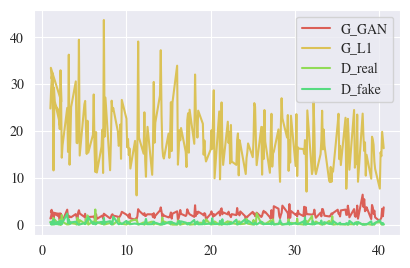

In [4]:
fig, ax = plt.subplots(figsize=set_size())

generate_stats_from_log('', fig=fig, ax=ax)